# Изучение закономерностей, определяющих успешность игр

В качестве аналитика интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, необходимо проанализировать исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Также нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Исходя из данных о продаже игр до 2016 года следует определить закономерности, определябщие успех той или иной игры, для определения успешного продукта и проведения эффективной рекламной кампании.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/games.csv')

data.head(10) #предварительно ознакамливаемся с данными


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Датасет состоит из 11 столбцов и 16715 строк. Следует приветси названия колонок к нижнему регистру, изменить тип данных, устранить пропуски там, где это возможно.

## Предобработка данных

In [2]:
data.info()

data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [3]:
data.columns = data.columns.str.lower()
data
#приводим название всех столбцов к нижнему регистру

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data['year_of_release'].unique()
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [5]:
data['user_score'].unique()
 
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

data['user_score'].unique()

data['user_score'] = data['user_score'].astype('float')
data['user_score'] = data['user_score'].fillna(0)
data['user_score'].describe
#термин tbd означает to be determined, то есть соответсвует Nan

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_116/3849135232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].astype('float')
/tmp/ipykernel_116/3849135232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<bound method NDFrame.describe of 0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16446, dtype: float64>

In [6]:
data['name'] = data['name'].dropna() #удаляем пропуски, так как их очень мало
data['year_of_release'] = data['year_of_release'].dropna() #удаляем пропуски, так как их очень мало

/tmp/ipykernel_116/4233443537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].dropna() #удаляем пропуски, так как их очень мало
/tmp/ipykernel_116/4233443537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].dropna() #удаляем пропуски, так как их очень мало


In [7]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#создадим столбец с суммой продаж во всех регионах

/tmp/ipykernel_116/471098759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


In [8]:
data.duplicated().sum()

0

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,31.38


## Исследовательский анализ данных

/tmp/ipykernel_116/3547640017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data.loc[data['year_of_release'] != 0, 'year_of_release']


<AxesSubplot:title={'center':'Выход игр по годам'}, xlabel='year_of_release'>

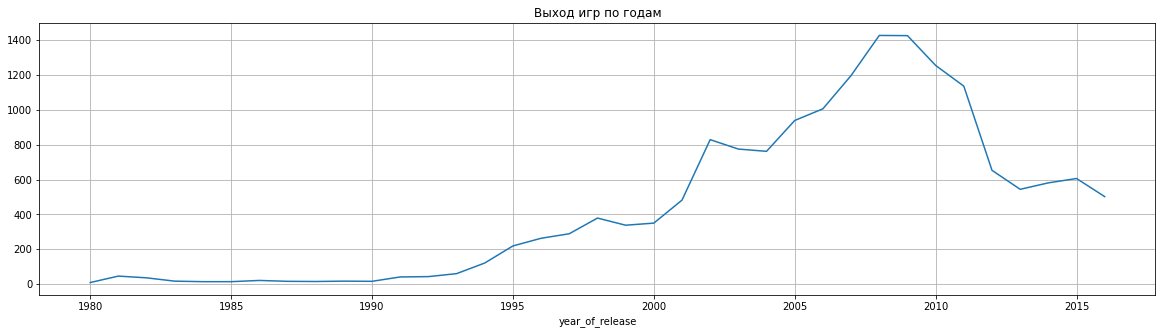

In [10]:
data['year_of_release'].unique()
data['year_of_release'] = data.loc[data['year_of_release'] != 0, 'year_of_release']
data['year_of_release'].unique()
data.groupby('year_of_release')['name'].count()
data.groupby('year_of_release')['name'].count().plot(figsize = (20,5), grid=True, title = 'Выход игр по годам')

Значений до 1994 года слишком мало по сравнению с последующими годами. Резкий "взлет" начался с приходом нового века, а в 2008 году наблюдался пик.

<AxesSubplot:title={'center':'Продажи игр по платформам'}, xlabel='platform'>

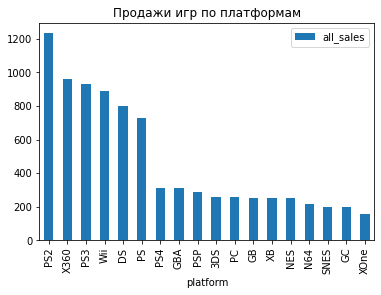

In [11]:
data['platform'].unique()
platform_pivot = data.pivot_table(index='platform', values = 'all_sales', aggfunc='sum')
platform_pivot.sort_values(by = 'all_sales', ascending = False)

platform_pivot = platform_pivot.loc[platform_pivot['all_sales'] > 100] 
platform_pivot.sort_values(by = 'all_sales', ascending = False).plot(kind = 'bar', title = 'Продажи игр по платформам')



In [12]:
data_platform = data[['platform', 'year_of_release', 'all_sales']]
data_platform = data_platform.groupby(['year_of_release', 'platform']).sum()
data_platform = data_platform.sort_values(by = ['year_of_release', 'all_sales'], ascending = False)
data_platform

all_sales
year_of_release platform           
2016.0          PS4           69.25
                XOne          26.15
                3DS           15.14
                PC             5.25
                WiiU           4.60
...                             ...
1983.0          NES           10.96
                2600           5.84
1982.0          2600          28.88
1981.0          2600          35.68
1980.0          2600          11.38

[238 rows x 1 columns]

In [13]:
year_platforms_pivot = data.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'max')
year_platforms_pivot.sort_values(by ='year_of_release') #самые популярные платформы по годам

,platform
year_of_release,
1980.0,2600
1981.0,2600
1982.0,2600
1983.0,NES
1984.0,NES
1985.0,PC
1986.0,NES
1987.0,NES
1988.0,PC


Последние годы (2013-2016) самой популярной приставкой считается XOne.

Актуальными данными для составления прогноза на 2017 год будут являться данные начиная с 2013 года. В этот период появились новые поколеняе игровых платформ, а количество выпускаемых игр ежегодно в этот период было примерно равным

In [14]:
data2=data.loc[data['year_of_release'] > 2012]
data2 = data2.reset_index()
#оставим в датасете только нужные данные

In [15]:
data2

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,0.0,NaN,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,0.0,NaN,14.60
4,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01
2229,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01
2230,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01
2231,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN,0.01


In [16]:
data2_pivot_all_sales = data2.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(by = 'all_sales', ascending = False)

Наиолее популярная платформа PS4, наименее популярна DS

In [17]:
data2_pivot_years = data2.pivot_table(index = ['year_of_release', 'platform'], values = 'all_sales', aggfunc = 'sum')
data2_pivot_years.loc[data2_pivot_years['all_sales'] > 20]

all_sales
year_of_release platform           
2013.0          3DS           56.57
                PS3          113.25
                PS4           25.99
                WiiU          21.65
                X360          88.58
2014.0          3DS           43.76
                PS3           47.76
                PS4          100.00
                WiiU          22.03
                X360          34.74
                XOne          54.07
2015.0          3DS           27.78
                PS4          118.90
                XOne          60.14
2016.0          PS4           69.25
                XOne          26.15

3DS теряет свою популярность на протяжении преиодна 2013-2016 так же, как и PS3. В последние годы наблюдается рост популярности у новых платформ XOne и PS4, они будут являться потенциально прибыльными

In [18]:
data2_pivot_years = data2.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
data2_pivot_years

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

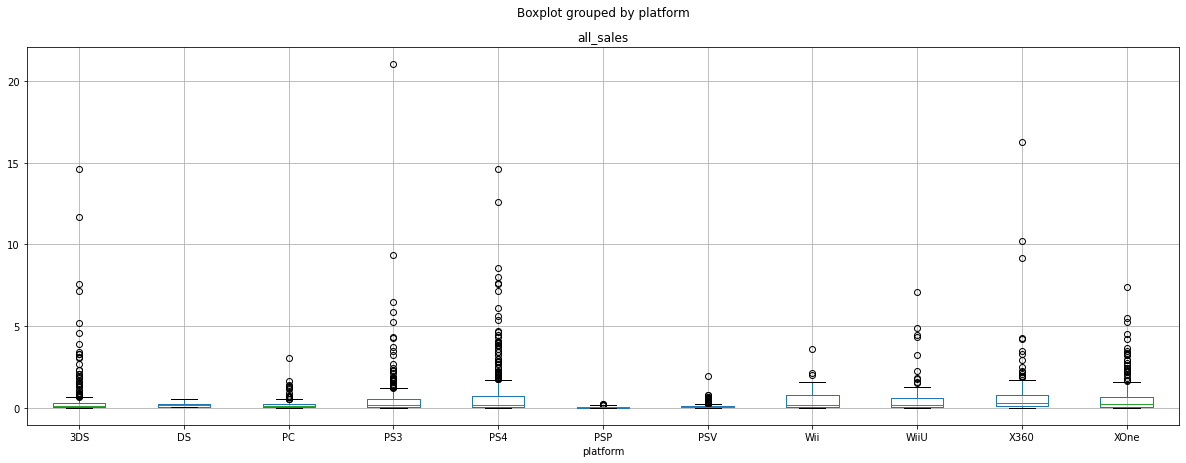

In [19]:
data2.boxplot(column='all_sales', by='platform', figsize = (20,7))

(0.0, 1.75)

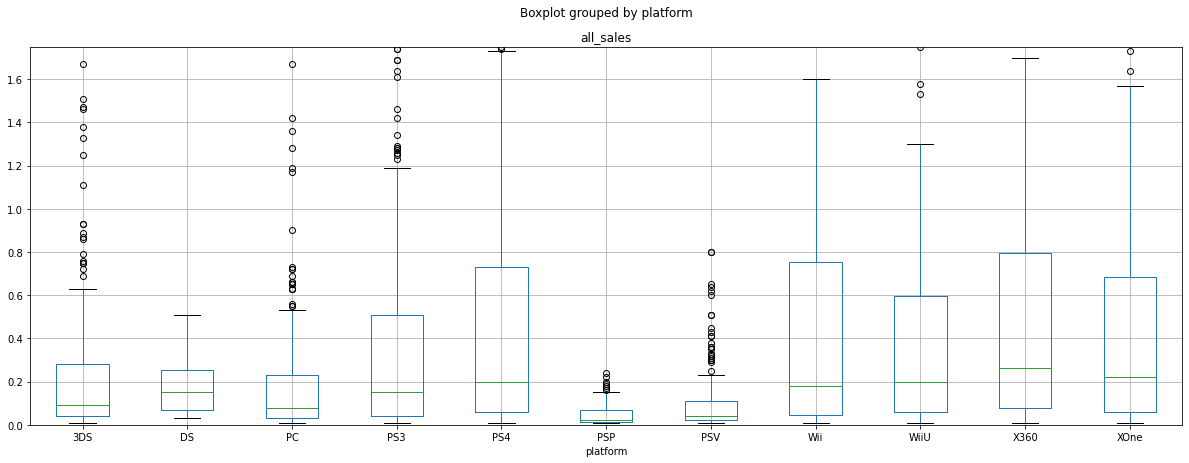

In [20]:
data2.boxplot(column='all_sales', by='platform', figsize = (20,7))
plt.ylim(0,1.75)

У платформ 3DS, PS3, PS4, X360 наблюдаются явные большие, но редкие выбросы, у многих других платформ наблюдаются, небольшие но частые выбросы. Размеры язиков подтверждают популярность определенных платформ.

In [21]:
#за популярную платформу возьмем PS4
data_PS4 = data2[['platform', 'critic_score', 'user_score', 'all_sales']]
data_PS4 = data_PS4.loc[data_PS4['platform'] == 'PS4']

data_PS4['critic_score'].corr(data_PS4['all_sales'])
#слабая корреляция

0.40656790206178095

<AxesSubplot:title={'center':'Продажи исходя из оценки критиков для PS4'}, xlabel='critic_score'>

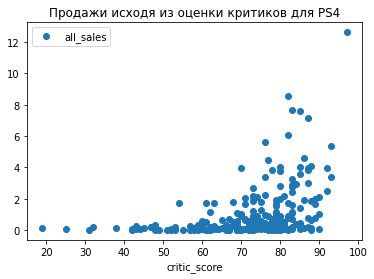

In [22]:
data_PS4.plot(x = 'critic_score', y = 'all_sales', style = 'o', title = 'Продажи исходя из оценки критиков для PS4')

In [23]:
data_PS4['user_score'].corr(data_PS4['all_sales'])
#очень слабая корреляция

0.11311562450852881

<AxesSubplot:title={'center':'Продажи исходя из оценки пользователей для PS4'}, xlabel='user_score'>

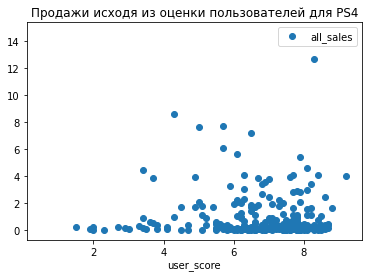

In [24]:
data_PS4.plot(x = 'user_score', y = 'all_sales', style = 'o', xlim = 0.1,  title = 'Продажи исходя из оценки пользователей для PS4')

Зависимости между оценками и продажами практически нет

Корреляция между оценкой пользователей и продажами крайне мала, а та же зависимость с оценками критиков значительно выше,и эту зависимость нужно учитывать

In [25]:
data_PS3 = data2[['platform', 'critic_score', 'user_score', 'all_sales']]
data_PS3 = data_PS3.loc[data_PS3['platform'] == 'PS3']

data_PS3['critic_score'].corr(data_PS3['all_sales'])

0.3342853393371919

<AxesSubplot:title={'center':'Продажи исходя из оценки критиков для PS3'}, xlabel='critic_score'>

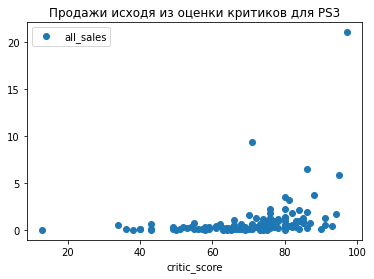

In [26]:
data_PS3.plot(x = 'critic_score', y = 'all_sales', style = 'o', title = 'Продажи исходя из оценки критиков для PS3')

In [27]:
data_PS3['user_score'].corr(data_PS3['all_sales'])

0.20209116183305123

<AxesSubplot:title={'center':'Продажи исходя из оценки пользователей для PS3'}, xlabel='user_score'>

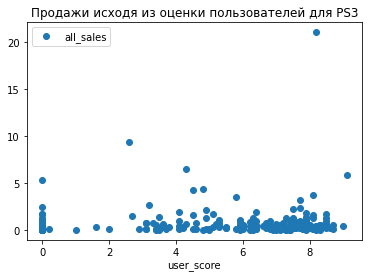

In [28]:
data_PS3.plot(x = 'user_score', y = 'all_sales', style = 'o', title = 'Продажи исходя из оценки пользователей для PS3')

In [29]:
data_PC = data2[['platform', 'critic_score', 'user_score', 'all_sales']]
data_PC = data_PC.loc[data_PC['platform'] == 'PC']

data_PC['critic_score'].corr(data_PC['all_sales'])

0.19603028294369382

<AxesSubplot:title={'center':'Продажи исходя из оценки критиков для PC'}, xlabel='critic_score'>

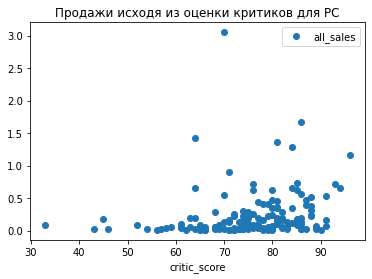

In [30]:
data_PC.plot(x = 'critic_score', y = 'all_sales', style = 'o', title = 'Продажи исходя из оценки критиков для PC')

In [31]:
data_PC['user_score'].corr(data_PC['all_sales'])

0.04088688502136773

<AxesSubplot:title={'center':'Продажи исходя из оценки пользователей для PC'}, xlabel='user_score'>

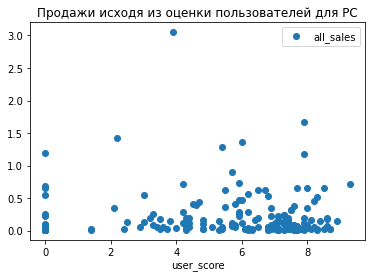

In [32]:
data_PC.plot(x = 'user_score', y = 'all_sales', style = 'o', title = 'Продажи исходя из оценки пользователей для PC')

In [33]:
data_PSV = data2[['platform', 'critic_score', 'user_score', 'all_sales']]
data_PSV = data_PSV.loc[data_PSV['platform'] == 'PSV']

data_PSV['critic_score'].corr(data_PSV['all_sales'])

0.2547423503068656

<AxesSubplot:title={'center':'Продажи исходя из оценки критиков для PSV'}, xlabel='critic_score'>

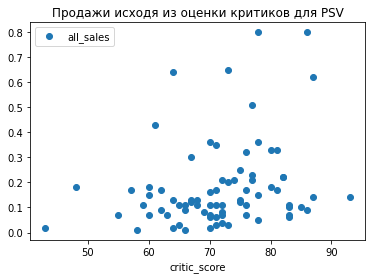

In [34]:
data_PSV.plot(x = 'critic_score', y = 'all_sales', style = 'o', title = 'Продажи исходя из оценки критиков для PSV')

In [35]:
data_PSV['user_score'].corr(data_PSV['all_sales'])

0.3249644552761793

<AxesSubplot:title={'center':'Продажи исходя из оценки пользователей для PSV'}, xlabel='user_score'>

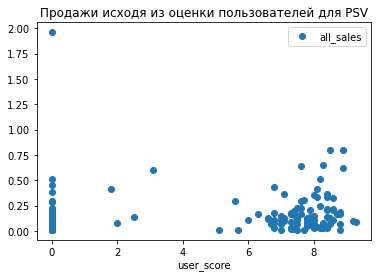

In [36]:
data_PSV.plot(x = 'user_score', y = 'all_sales', style = 'o', title = 'Продажи исходя из оценки пользователей для PSV')

У PS4 самая сильная зависимость между оценкой критиков и продажами, зависимость между оценками пользователеей и продажами значительно меньше. Такая же тенденция характерна и для PS3, и для PC. У PSV напротив наблюдается бОлбша зависимость между оценками пользователеей и продажами.

Можно выделить впечатляющие результаты по продажам игр для следующих платформ: PS2, DS, PS, GBA, PSP. Это может объясняться действительно революционными нововведениями, что обеспечило большие продажи

Топ 5 платформ по продажам - PS4, PS3, XOne, 3DS, X360. Рассматривая даиграмму размаха, можно заметить большое количество выьрасов, что, возможно, означает повышенный интерес к той или иной игре


In [37]:
data2[['genre', 'all_sales']].groupby('genre').sum().sort_values(by='all_sales', ascending = False)

,all_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Продажи по данным отображены в талице, но это может быть связано с количеством игр определенных жанров

In [38]:
data2['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

<AxesSubplot:title={'center':'Популярные жанры игр'}, xlabel='genre'>

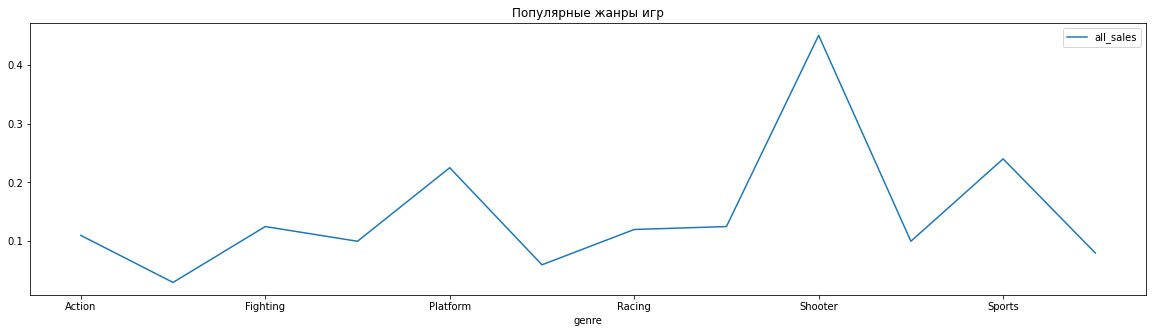

In [39]:
data2.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'median').plot(figsize=(20, 5), title = 'Популярные жанры игр')

Самые прибыльные жанры - Shooter, Sports, Platform

### Портрет пользователя каждого региона

In [40]:
data3 = data2[['platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rating']]
data3

,platform,genre,na_sales,eu_sales,jp_sales,other_sales,rating
0,PS3,Action,7.02,9.09,0.98,3.96,M
1,X360,Action,9.66,5.14,0.06,1.41,M
2,PS4,Shooter,6.03,5.86,0.36,2.38,NaN
3,3DS,Role-Playing,5.28,4.19,4.35,0.78,NaN
4,PS4,Action,3.96,6.31,0.38,1.97,M
...,...,...,...,...,...,...,...
2228,PSV,Adventure,0.00,0.00,0.01,0.00,NaN
2229,PSV,Misc,0.00,0.00,0.01,0.00,NaN
2230,PS3,Action,0.00,0.00,0.01,0.00,NaN
2231,PSV,Adventure,0.00,0.00,0.01,0.00,NaN


In [41]:
data3.groupby('platform')['na_sales'].sum().sort_values(ascending = False)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: na_sales, dtype: float64

Самые популярные платформы в NA - PS4, XOne, X360, PS3, 3DS

In [42]:
data3.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: eu_sales, dtype: float64

Самые популярные платформы в EU - PS4, PS3, XOne, X360, 3DS

In [43]:
data3.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: jp_sales, dtype: float64

Самые популярные платформы в JP - 3DS, PS3, PSV, PS4, WiiU

In [44]:
data3.groupby('platform')['other_sales'].sum().sort_values(ascending = False)

platform
PS4     48.35
PS3     26.77
XOne    14.27
X360    12.11
3DS      6.28
WiiU     4.69
PSV      3.26
PC       2.96
Wii      1.12
DS       0.12
PSP      0.04
Name: other_sales, dtype: float64

Самые популярные платформы в других регионах - PS4, PS3, XOne, X360, 3DS

Различия обусловлены страной-производителем платформы, культурой страны и популярностью приставки в целом. Например:
1. 3DS - японская платформа, поэтому она так распространена в JP
2. XOne, X360 - платформа американской компании Microsoft, поэтому они популярны в NA
3. PS - большая и популярная компания с большим количеством экскоюзивных игр, поэтому она популярна по всему миру


In [45]:
data3.groupby('genre')['na_sales'].sum().sort_values(ascending = False)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: na_sales, dtype: float64

Самые популярные жанры в NA - Action, Shooter, Sports, Role-Playing, Misc

In [46]:
data3.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: eu_sales, dtype: float64

Самые популярные жанры в EU - Action, Shooter, Sports, Role-Playing, Racing

In [47]:
data3.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: jp_sales, dtype: float64

In [48]:
Самые популярные жанры в EU - Role-Playing, Action, Misc, Fighting, Shooter

SyntaxError: invalid syntax (3225959765.py, line 1)

In [ ]:
data3.groupby('genre')['other_sales'].sum().sort_values(ascending = False)

Самые популярные жанры в EU - Action, Shooter, Sports, Role-Playing, Misc

Разница жанров по регионам обуславливается, вероятнее всего, культурой регионов и деятельностью местных разработчиков. Вкусы в Америке и Европе схожи, а в Японии отличаются

In [ ]:
data3['rating'] = data3['rating'].fillna('Unknown')
data3['rating'].unique()
#обозначим не обозначеннный рейтинг как Unknown

In [ ]:
data3.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

In [ ]:
data3.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

In [ ]:
data3.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

In [ ]:
data3.groupby('rating')['other_sales'].sum().sort_values(ascending = False)

Игры с рейтингом 18+ востребованы в большинстве регионов, также продается значительное количество игр без рейтинга. Это можно объяснить тем, что рейтинг ESRB предназначен для маркировки игр в США и Канаде. Многие популярные игры могут быть без рейтинга, так как они выпущены не в Северной Америке

## Проверка гипотез

In [ ]:
data_user_score_PCXbox = data2[['platform', 'user_score']]
data_user_score_PC = data_user_score_PCXbox.loc[data_user_score_PCXbox['platform'] == 'PC'] 
data_user_score_X = data_user_score_PCXbox.loc[data_user_score_PCXbox['platform'] == 'XOne']

In [ ]:
data_user_score_PC

In [ ]:
data_user_score_X

гипотезы
1. H0: средние оценки по обеим платформам одинаковые
2. H1: средние оценки по обеим платформам разные

In [ ]:
from scipy import stats as st

xbox = data_user_score_X.loc[data_user_score_X['user_score'] != 0, 'user_score']
pc = data_user_score_PC.loc[data_user_score_PC['user_score'] != 0, 'user_score']
alpha = .05 

results = st.ttest_ind(xbox, pc)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Мы не можем отвергнуть гипотезу о том, что средние оценки по обеим платформам одинаковые. Возможно, оценки дейтвительно одинаковые.

In [ ]:
data_user_genre_AS = data2[['genre', 'user_score']]
data_user_genre_A = data_user_genre_AS.loc[data_user_genre_AS['genre'] == 'Action'] 
data_user_genre_S = data_user_genre_AS.loc[data_user_genre_AS['genre'] == 'Sports']
data_user_genre_A

In [ ]:
data_user_genre_S

гипотезы
1. H0: средние оценки по обеим жанрам разные
2. H1: средние оценки по обеим жанрам одинаковые

In [ ]:
action = data_user_genre_A.loc[data_user_genre_A['user_score'] != 0, 'user_score']
sports = data_user_genre_S.loc[data_user_genre_S['user_score'] != 0, 'user_score']
alpha = .05 

results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем гипотезу о том, что средние оценки по обеим жанрам разные. Возможно, оценки одинаковые

# Вывод
Исходя из результатов исследования можно сделать некоторые прогнозы для кампании 2017 года. Наиболее популярные платформы для игр - PS4, PS3, XOne, 3DS, X360. Особенно популярны игры в жанра Shooter, Sports, Platform. Однако всегда стоит делать поправку на конкретный регион. Так, например, в Японии самаой востребованой стала платформа 3DS. В основном на рынке востребованы игры с рейтингом 18+ (M), также продается значительное количество игр без указанного рейтинга.
Вероятнее всего, в следующем году будут востребованы игры на PS4 в жанре shooter с рейтингом M.